# Inaugural Project

Imports and set magics:

In [259]:
import numpy as np
from scipy import optimize

%matplotlib inline
%load_ext autoreload 
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 10})

#import .py file and create class
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

I call the solve_discrete() function inside two nested for loops in which alpha and sigma vary thanks to np arrays. I extract the solutions HF and HM and print their ratio. Ratio_dict is a dictionary where results are saved in order to plotting.

In [260]:
model = HouseholdSpecializationModelClass()
alpha_vec = np.linspace(0.25,0.75,3)
sigma_vec = np.linspace(0.5,1.5,3)
ratio_dict = {}
for alpha in alpha_vec:
    ratio_dict[alpha]=[]
    for sigma in sigma_vec:
        model.par.alpha = alpha
        model.par.sigma = sigma
        model.solve_discrete()
        ratio = model.sol.HF/model.sol.HM # ratio = HF/HM
        ratio_dict[alpha].append(ratio)
        print(f'alpha = {alpha:.3f}, sigma = {sigma:.3f}, Hf/Hm = {ratio:.3f}')

/Users/michelescola/Desktop/PROGRAMMING/projects-2023-michele-scola/inauguralproject/inauguralproject.py:76: RuntimeWarning: invalid value encountered in reciprocal
  disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)


alpha = 0.250, sigma = 0.500, Hf/Hm = 0.545
alpha = 0.250, sigma = 1.000, Hf/Hm = 0.308
alpha = 0.250, sigma = 1.500, Hf/Hm = 0.214
alpha = 0.500, sigma = 0.500, Hf/Hm = 1.000
alpha = 0.500, sigma = 1.000, Hf/Hm = 1.000
alpha = 0.500, sigma = 1.500, Hf/Hm = 1.000
alpha = 0.750, sigma = 0.500, Hf/Hm = 1.833
alpha = 0.750, sigma = 1.000, Hf/Hm = 3.250
alpha = 0.750, sigma = 1.500, Hf/Hm = 4.667


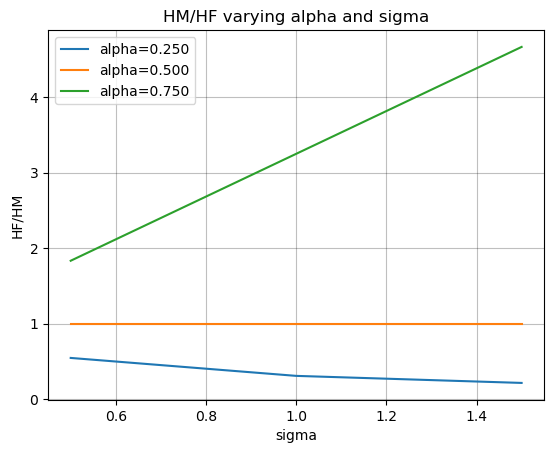

In [261]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigma_vec,ratio_dict[0.250], label='alpha=0.250')
ax.plot(sigma_vec,ratio_dict[0.500], label='alpha=0.500')
ax.plot(sigma_vec,ratio_dict[0.750], label='alpha=0.750')
ax.set_title('HM/HF varying alpha and sigma')
ax.set_xlabel('sigma')
ax.set_ylabel('HF/HM')
ax.legend(loc='upper left');

# Question 2

I call the solve_discrete() function into a loop in which wF vary. I extract HF and HM solutions and save the logarithm of their ratio into a vector. I also save the logarithm of wages ratio into another vector. Lastly I plot log(HF/HM) against log(wf/wm).

In [262]:
model = HouseholdSpecializationModelClass()
for i,wf in enumerate(model.par.wF_vec):
    model.par.wF = wf
    model.solve_discrete()
    model.sol.log_ratio_vec[i] = np.log(model.sol.HF/model.sol.HM)
    model.sol.log_wages_vec[i] = np.log(model.par.wF)
print(model.sol.log_ratio_vec)
print(model.sol.log_wages_vec)

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


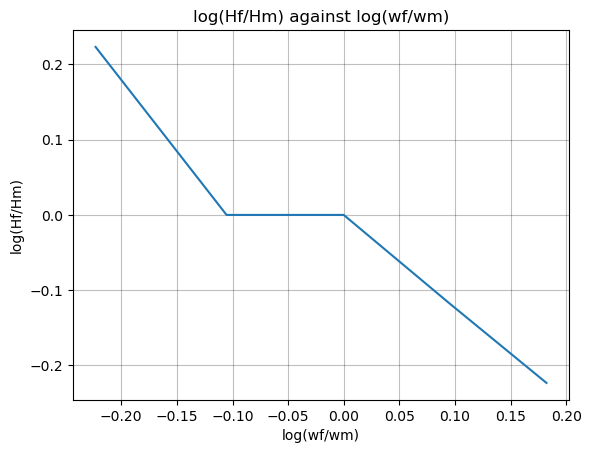

In [263]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sol.log_wages_vec,model.sol.log_ratio_vec)
ax.set_title('log(Hf/Hm) against log(wf/wm)')
ax.set_xlabel('log(wf/wm)')
ax.set_ylabel('log(Hf/Hm)');

# Question 3

I proceed in the same way as question 2. This time I call the solve() function who solve the maximization problem assuming that the choice set is continuous.

In [264]:
model = HouseholdSpecializationModelClass()
for i,wf in enumerate(model.par.wF_vec):
    model.par.wF = wf
    model.solve()
    model.sol.log_ratio_vec[i] = np.log(model.sol.HF/model.sol.HM)
    model.sol.log_wages_vec[i] = np.log(model.par.wF)
print(model.sol.log_ratio_vec)
print(model.sol.log_wages_vec)

[ 6.90144953e-05  3.18191014e-05  1.99840144e-15 -2.73835224e-05
 -5.10757479e-05]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


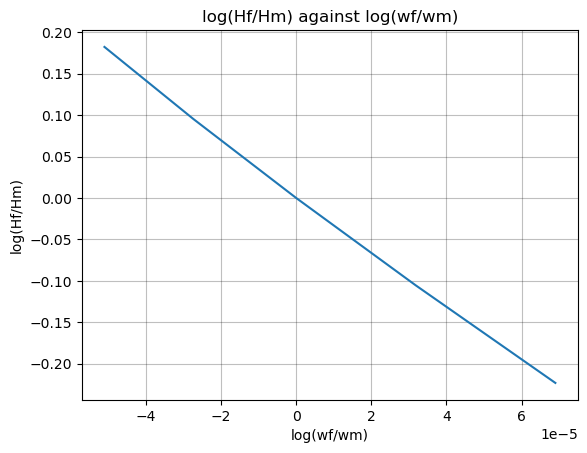

In [265]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.sol.log_ratio_vec,model.sol.log_wages_vec)
ax.set_title('log(Hf/Hm) against log(wf/wm)')
ax.set_xlabel('log(wf/wm)')
ax.set_ylabel('log(Hf/Hm)');

# Question 4

I call the model.estimate() function which choose alpha and sigma such it minimize  (β0 − β0)^2 + (β1 − β1)^2 by using Nelder-Mead method into the optimize.minimize fuction.

I change values of alpha ad sigma and call the run_regression() function in order to estimate the new values of beta0 and beta1.

I plot both model and data regressions.

In [273]:
model = HouseholdSpecializationModelClass()
model.estimate()

alpha = 0.8310095358042134, sigma = 0.896675585336914


In [279]:
model.par.alpha = model.sol.alpha_sol
model.par.sigma = model.sol.sigma_sol
model.run_regression()
model.sol.log_ratio_vec = np.log(model.sol.HF_vec/model.sol.HM_vec)
#print(f'beta0 = {model.sol.beta0}, beta1 =  {model.sol.beta1}')

In [278]:
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#x = np.log(model.par.wF_vec)
#y = model.par.beta0_target + model.par.beta1_target*x
#x1 = np.log(model.par.wF_vec)
#y1 = model.sol.log_ratio_vec
#ax.plot(x,y, label = 'Siminski and Yetsenga')
#ax.plot(x1,y1, label = 'data')
#ax.plot()
#ax.set_title('model and data')
#ax.set_xlabel('log(wf/wm)')
#ax.set_ylabel('log(Hf/Hm)')
#ax.legend(loc='center left');

# Question 5

ADD CONCISE CONLUSION.